<a href="https://colab.research.google.com/github/jain726/Deep-Learning/blob/Deep-Learning/%233_ANN_Text_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [212]:
class Model(nn.Module):
    def __init__(self, in_features=1764, h1=512, h2=128, out_features=26):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [213]:
torch.manual_seed(42)
model = Model()

In [214]:
data_link = '/content/hog_output.csv'
data = pd.read_csv(data_link)
X = data.drop('label', axis = 1).values
y = pd.to_numeric(data['label'], errors='coerce')  # convert to numbers, NaN if invalid
print(y.isna().sum())  # Debug: check how many labels were invalid

y = y.dropna().astype(int)  # remove NaNs and convert to int
X = X[:len(y)]  # align X with y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

0


In [215]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [216]:
y_train = torch.LongTensor(np.array(y_train))
y_test = torch.LongTensor(np.array(y_test))

In [217]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
y_train = y_train - 1
y_test = y_test - 1
print(torch.unique(y_train))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25])


In [218]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)

In [219]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())

  if i % 5 == 0:
    print(f'Epoch: {i} Loss: {loss.item()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 3.2500152587890625
Epoch: 5 Loss: 0.9214610457420349
Epoch: 10 Loss: 0.2745412588119507
Epoch: 15 Loss: 0.08817165344953537
Epoch: 20 Loss: 0.02212410978972912
Epoch: 25 Loss: 0.008312313817441463
Epoch: 30 Loss: 0.0054447706788778305
Epoch: 35 Loss: 0.00625575939193368
Epoch: 40 Loss: 0.009956187568604946
Epoch: 45 Loss: 0.014290818013250828
Epoch: 50 Loss: 0.012504888698458672
Epoch: 55 Loss: 0.0070635974407196045
Epoch: 60 Loss: 0.00479582604020834
Epoch: 65 Loss: 0.004844094160944223
Epoch: 70 Loss: 0.005608791019767523
Epoch: 75 Loss: 0.005300333257764578
Epoch: 80 Loss: 0.004433297552168369
Epoch: 85 Loss: 0.004280867986381054
Epoch: 90 Loss: 0.004548496566712856
Epoch: 95 Loss: 0.00447299238294363


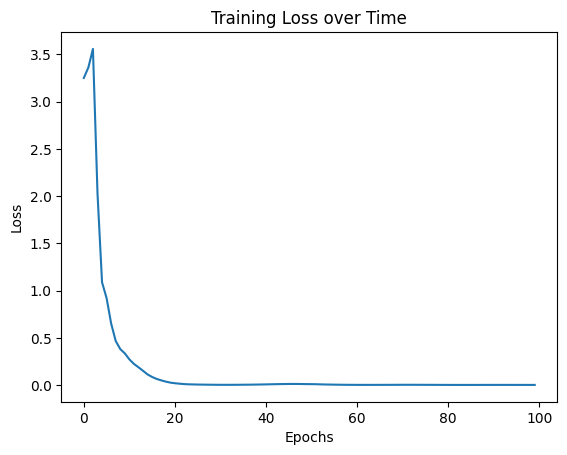

In [220]:
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss over Time")
plt.show()

In [221]:
with torch.no_grad():
  y_eval = model(X_test)
  loss = criterion(y_eval, y_test)
  predicted = torch.argmax(y_eval, dim = 1)
  accuracy = (predicted == y_test).float().mean()
print(f'Test Loss: {loss.item():.4f}')
print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')

Test Loss: 0.3144
Test Accuracy: 93.28%
